## **Agglomerative Clustering**
### **Author:** Hansal Shah 


# **Importing required libraries**

In [ ]:
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# **Loading the dataset**

In [ ]:
usarrests = pd.read_csv('/content/drive/MyDrive/USArrests.csv')

In [ ]:
usarrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


**Hence before feeding the dataset to the model, we need to remove the column containing object datatype.**


In [ ]:
usarrests.drop(['Unnamed: 0'],axis=1,inplace=True)

# **Agglomerative hierarchical clustering algorithm from scratch**

In [ ]:
class AgglomerativeClustering:

  def __init__(self, distance_metric='min'):
    self.dataset = None
    self.distance_metric=distance_metric
    self.linkages = []
    self.new_clusters = []

    
  def fit(self, X):
    self.dataset = np.array(X)
    # clusters = [list(X[i]) for i in range(len(X))] 
    progressions = [[i] for i in range(len(X))]
    index = 1
    
    while len(progressions)>1:

      # Generating the distance matrix
      dist_matrix = self.generate_distance_matrix(progressions)

      # Finding the indexes of the clusters that are closest to each other
      min_index = np.unravel_index(np.argmin(dist_matrix), dist_matrix.shape)

      # Generating the new cluster
      new_cluster = []
      for sample in progressions[min_index[0]]:
        new_cluster.append(sample)
      for sample in progressions[min_index[1]]:
        new_cluster.append(sample)    
      
      self.new_clusters.append(new_cluster)

      # Generating the linkage array 
      temp_linkage = []
      if len(progressions[min_index[0]])==1:
        temp_linkage.append(progressions[min_index[0]][0])
      else:
        temp_linkage.append(self.new_clusters.index(progressions[min_index[0]])+
                            self.dataset.shape[0])
        
      if len(progressions[min_index[1]])==1:
        temp_linkage.append(progressions[min_index[1]][0])
      else:
        temp_linkage.append(self.new_clusters.index(progressions[min_index[1]])+
                            self.dataset.shape[0])
        
      temp_linkage.append(np.min(dist_matrix))
      temp_linkage.append(len(new_cluster))

      # Appending the new linkage in the global linkage
      self.linkages.append(temp_linkage)

      #Removing the combined clusters and inserting the new one
      progression1 = progressions[min_index[0]]
      progression2 = progressions[min_index[1]]
      progressions.remove(progression1)
      progressions.remove(progression2)
      progressions.append(new_cluster)
      index+=1

  def generate_distance_matrix(self, sample_clusters):
    dist_matrix = np.zeros((len(sample_clusters),len(sample_clusters)))

    for i in range(len(sample_clusters)):
      for j in range(i+1):
        if i!=j:
          dist = None

          if self.distance_metric=='min':
            dist = self.min_distance(sample_clusters[i], sample_clusters[j])
          elif self.distance_metric=='max':
            dist = self.max_distance(sample_clusters[i], sample_clusters[j])
          elif self.distance_metric=='mean':
            dist = self.mean_distance(sample_clusters[i], sample_clusters[j])
          elif self.distance_metric=='average':
            dist = self.average_distance(sample_clusters[i], sample_clusters[j])

          dist_matrix[i][j] = dist
          dist_matrix[j][i] = dist 

        else:
          dist_matrix[i][j] = math.inf
    
    return dist_matrix

  def min_distance(self, cluster1, cluster2):
    sample_distances = []
    for sample1 in cluster1:
      for sample2 in cluster2:
        sample_distances.append(self.euclidean_distance(sample1, sample2))
    return min(sample_distances)

  def max_distance(self, cluster1, cluster2):
    sample_distances = []
    for sample1 in cluster1:
      for sample2 in cluster2:
        sample_distances.append(self.euclidean_distance(sample1, sample2))
    return max(sample_distances)
  
  def mean_distance(self, cluster1, cluster2):
      c1 = (np.sum(self.dataset[cluster1],axis=0))/len(cluster1)
      c2 = (np.sum(self.dataset[cluster2],axis=0))/len(cluster2)
      return np.sqrt(np.sum((c1-c2)**2))

  def average_distance(self,cluster1, cluster2):
    sample_distances = []
    for sample1 in cluster1:
      for sample2 in cluster2:
        sample_distances.append(self.euclidean_distance(sample1, sample2))
    return np.sum(np.array(sample_distances))/(len(cluster1)*len(cluster2))
  
  def euclidean_distance(self, sample1, sample2):
    return np.sqrt(np.sum((self.dataset[sample1]-self.dataset[sample2])**2))

  def show_dendrogram(self):
    fig = plt.figure(figsize=(12, 8)) 
    dn = dendrogram(np.array(self.linkages))
    plt.show()

# **Fitting the model according to the user input**


Distance metrics for agglomerative clustering: 
1. Minimmum distance
2. Maximum distance
3. Mean distance
4. Average distance

Enter your choice number: 1

 You have chosen the minimum distance measure

The dendrogram after agglomerative clustering


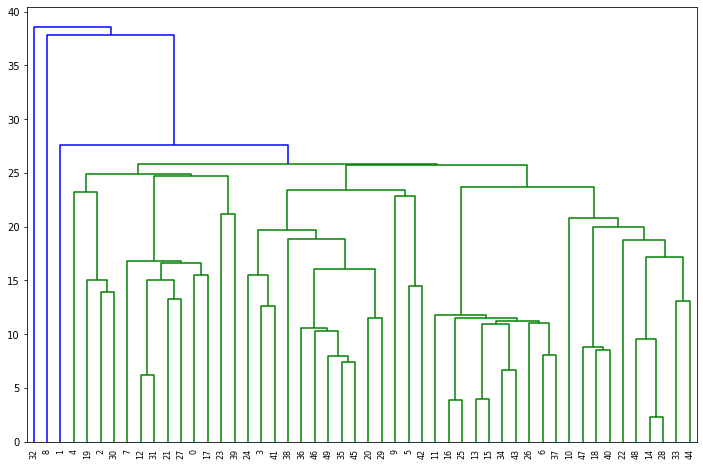


Do you want to continue? (Y/N): y

Distance metrics for agglomerative clustering: 
1. Minimmum distance
2. Maximum distance
3. Mean distance
4. Average distance

Enter your choice number: 2

 You have chosen the maximum distance measure

The dendrogram after agglomerative clustering


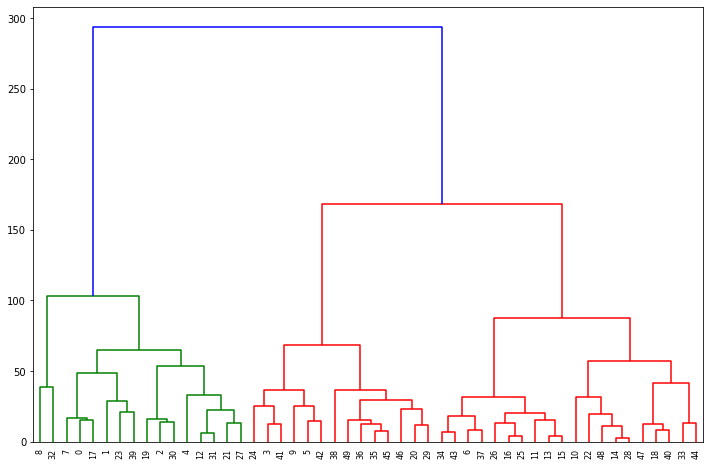


Do you want to continue? (Y/N): y

Distance metrics for agglomerative clustering: 
1. Minimmum distance
2. Maximum distance
3. Mean distance
4. Average distance

Enter your choice number: 3

 You have chosen the mean distance measure

The dendrogram after agglomerative clustering


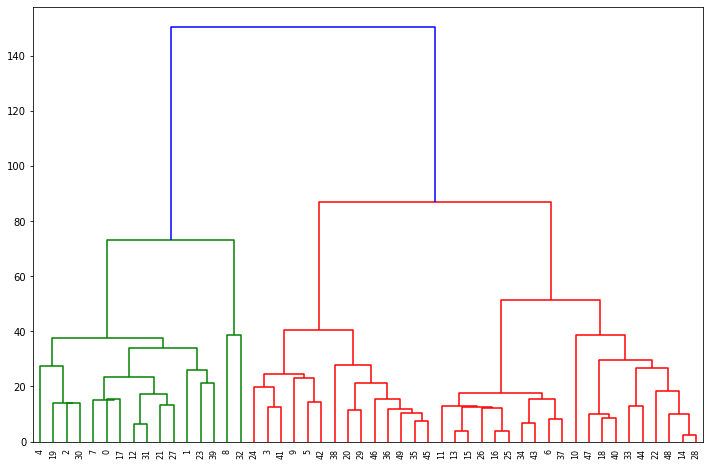


Do you want to continue? (Y/N): y

Distance metrics for agglomerative clustering: 
1. Minimmum distance
2. Maximum distance
3. Mean distance
4. Average distance

Enter your choice number: 4

 You have chosen the average distance measure

The dendrogram after agglomerative clustering


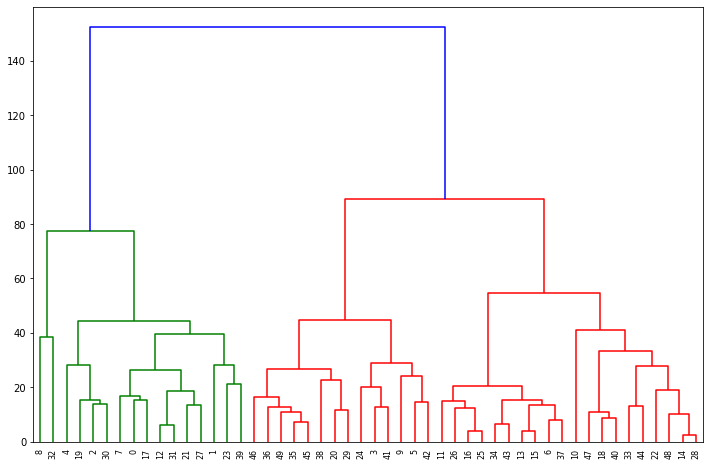


Do you want to continue? (Y/N): n


In [ ]:
while True:
  print('\nDistance metrics for agglomerative clustering: ')
  print('1. Minimmum distance')
  print('2. Maximum distance')
  print('3. Mean distance')
  print('4. Average distance')
  metric_choice = int(input('\nEnter your choice number: '))
  model = AgglomerativeClustering()

  if metric_choice==1:
    model.distance_metric='min'
    print('\n You have chosen the minimum distance measure')
  elif metric_choice==2:
    model.distance_metric='max'
    print('\n You have chosen the maximum distance measure')
  elif metric_choice==3:
    model.distance_metric='mean'
    print('\n You have chosen the mean distance measure')
  elif metric_choice==4:
    model.distance_metric='average'
    print('\n You have chosen the average distance measure')
  else:
    print('\nPlease enter a valid choice number!')

  model.fit(usarrests)
  print('\nThe dendrogram after agglomerative clustering')
  model.show_dendrogram()

  temp = input('\nDo you want to continue? (Y/N): ')
  if temp.lower()=='n':
    break
  elif temp.lower()!='y':
    print('\nNot a valid input!')
  
  


# **Verification using the built in library functions**

---
### **1.   Minimum distance measure**





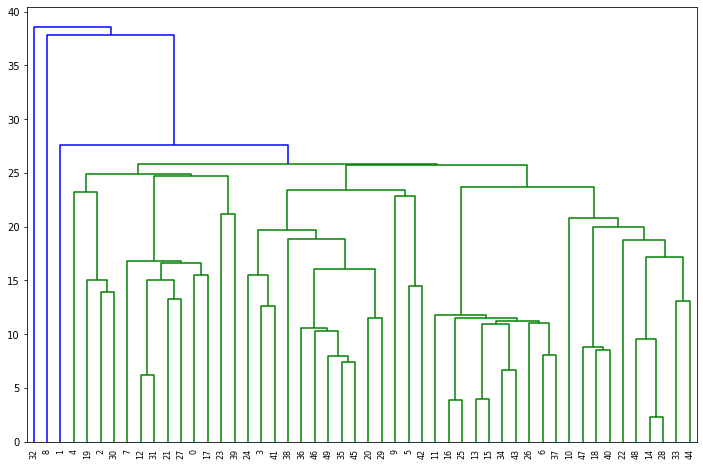

In [ ]:
Z = linkage(np.array(usarrests), 'single')
fig = plt.figure(figsize=(12, 8))
dn = dendrogram(Z)

### **2.   Maximum distance measure**





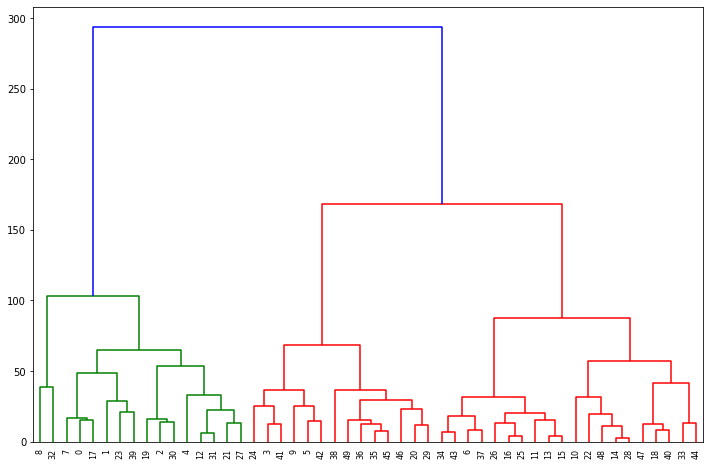

In [ ]:
Z = linkage(np.array(usarrests), 'complete')
fig = plt.figure(figsize=(12, 8))
dn = dendrogram(Z)

### **3. Average distance measure**

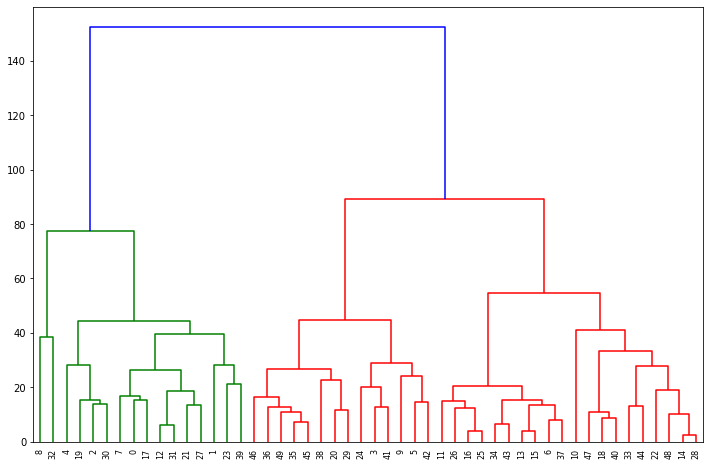

In [ ]:
Z = linkage(np.array(usarrests), 'average')
fig = plt.figure(figsize=(12, 8))
dn = dendrogram(Z)

# **Conclusion**
---

**The dendrograms created using the model created from scratch and built in scipy library functions are the same. Hence, the scratch code is working fine.**
